In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

In [48]:

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [49]:

train = pd.read_csv('Input/train.csv')
test = pd.read_csv('Input/test.csv')


In [50]:

print(train.shape)

(798, 39)


In [51]:
train.head(10)

,family,product-type,steel,4,hardness,temper_rolling,condition,formability,strength,non-ageing,surface-finish,surface-quality,enamelability,bc,bf,bt,bw/me,bl,m,chrom,phos,cbond,marvi,exptl,ferro,corr,blue/bright/varn/clean,lustre,jurofm,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,?,G,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,?,E,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,Y,?,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,?,E,?,?,Y,?,B,?,?,?,?,?,?,?,?,?,?,?,?,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,M,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,B,Y,?,?,?,Y,?,?,?,?,?,?,?,?,?,SHEET,0.801,255.0,269,?,0,?,3
5,?,C,A,0,45,?,S,?,0,?,?,D,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,1.600,610.0,0,?,0,?,3
6,?,C,R,0,0,?,S,2,0,?,?,E,?,?,?,?,?,Y,?,?,?,?,?,?,?,?,?,?,?,?,?,SHEET,0.699,610.0,4880,Y,0,?,3
7,?,C,A,0,0,?,S,2,0,?,?,E,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,Y,?,?,?,COIL,3.300,152.0,0,?,0,?,3
8,?,C,R,0,0,?,S,2,0,?,?,E,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,Y,?,?,?,COIL,0.699,1320.0,0,?,0,?,3
9,?,C,A,0,0,?,S,3,0,N,?,E,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,SHEET,1.000,1320.0,762,?,0,?,3


In [52]:
train.describe()

,4,hardness,strength,thick,width,len,bore
count,798.000000,798.000000,798.00000,798.000000,798.000000,798.000000,798.000000
mean,3.547619,11.748120,30.85213,1.181847,781.744361,1273.037594,28.195489
std,13.592644,24.621001,115.55127,0.861608,404.722346,1886.768139,124.811534
min,0.000000,0.000000,0.00000,0.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.601000,609.900000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.800000,610.000000,611.000000,0.000000
75%,0.000000,0.000000,0.00000,1.600000,1250.000000,762.000000,0.000000
max,70.000000,85.000000,700.00000,4.000000,1525.000000,4880.000000,600.000000


In [53]:
combined = train.append(test)
print(combined.shape)
combined.reset_index(inplace=True)

(898, 39)


In [54]:
cabin_dummies = pd.get_dummies(train['classes'], prefix='class')    
train = pd.concat([train, cabin_dummies], axis=1)

In [55]:
train.head()

,family,product-type,steel,4,hardness,temper_rolling,condition,formability,strength,non-ageing,surface-finish,surface-quality,enamelability,bc,bf,bt,bw/me,bl,m,chrom,phos,cbond,marvi,exptl,ferro,corr,blue/bright/varn/clean,lustre,jurofm,s,p,shape,thick,width,len,oil,bore,packing,classes,class_1,class_2,class_3,class_5,class_U
0,?,C,A,8,0,?,S,?,0,?,?,G,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,0.700,610.0,0,?,0,?,3,0,0,1,0,0
1,?,C,R,0,0,?,S,2,0,?,?,E,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,Y,?,?,?,COIL,3.200,610.0,0,?,0,?,3,0,0,1,0,0
2,?,C,R,0,0,?,S,2,0,?,?,E,?,?,Y,?,B,?,?,?,?,?,?,?,?,?,?,?,?,?,?,SHEET,0.700,1300.0,762,?,0,?,3,0,0,1,0,0
3,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,M,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,2.801,385.1,0,?,0,?,3,0,0,1,0,0
4,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,B,Y,?,?,?,Y,?,?,?,?,?,?,?,?,?,SHEET,0.801,255.0,269,?,0,?,3,0,0,1,0,0


In [56]:
# train.drop('classes', axis=1, inplace=True)
train.head()

,family,product-type,steel,4,hardness,temper_rolling,condition,formability,strength,non-ageing,surface-finish,surface-quality,enamelability,bc,bf,bt,bw/me,bl,m,chrom,phos,cbond,marvi,exptl,ferro,corr,blue/bright/varn/clean,lustre,jurofm,s,p,shape,thick,width,len,oil,bore,packing,classes,class_1,class_2,class_3,class_5,class_U
0,?,C,A,8,0,?,S,?,0,?,?,G,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,0.700,610.0,0,?,0,?,3,0,0,1,0,0
1,?,C,R,0,0,?,S,2,0,?,?,E,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,Y,?,?,?,COIL,3.200,610.0,0,?,0,?,3,0,0,1,0,0
2,?,C,R,0,0,?,S,2,0,?,?,E,?,?,Y,?,B,?,?,?,?,?,?,?,?,?,?,?,?,?,?,SHEET,0.700,1300.0,762,?,0,?,3,0,0,1,0,0
3,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,M,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,2.801,385.1,0,?,0,?,3,0,0,1,0,0
4,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,B,Y,?,?,?,Y,?,?,?,?,?,?,?,?,?,SHEET,0.801,255.0,269,?,0,?,3,0,0,1,0,0


In [57]:
x=0
for data in train["m"]:
    if data=="?":
        x+=1
print(x)

798


In [58]:
x=0
for data in train["bt"]:
    if data=="?":
        x+=1
print(x)

736


In [59]:
x=0
for data in train["bc"]:
    if data=="?":
        x+=1
print(x)

797


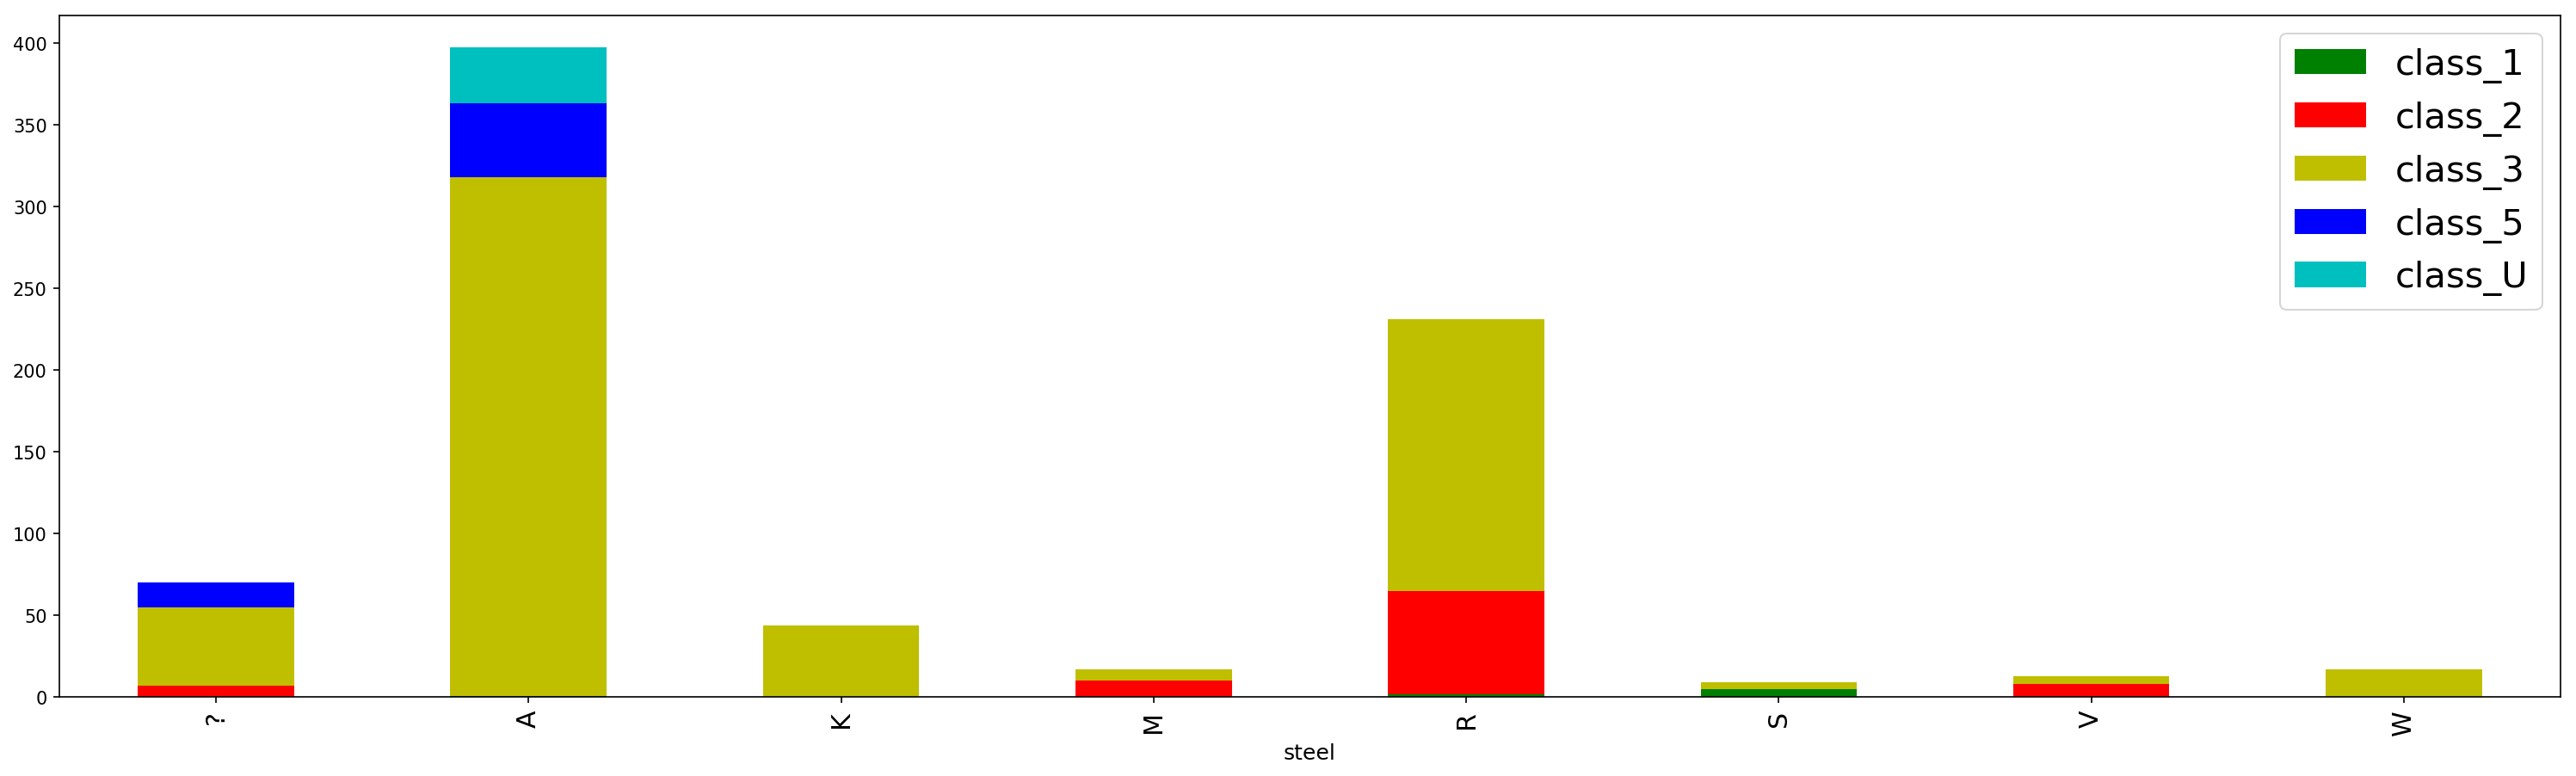

In [60]:
  train.groupby('steel').agg('sum')[['class_1','class_2','class_3','class_5','class_U']].plot(kind='bar', figsize=(25, 7),
                                                           stacked=True, colors=['g', 'r','y','b','c']);

In [61]:
tty=train[(train.steel=='A')]

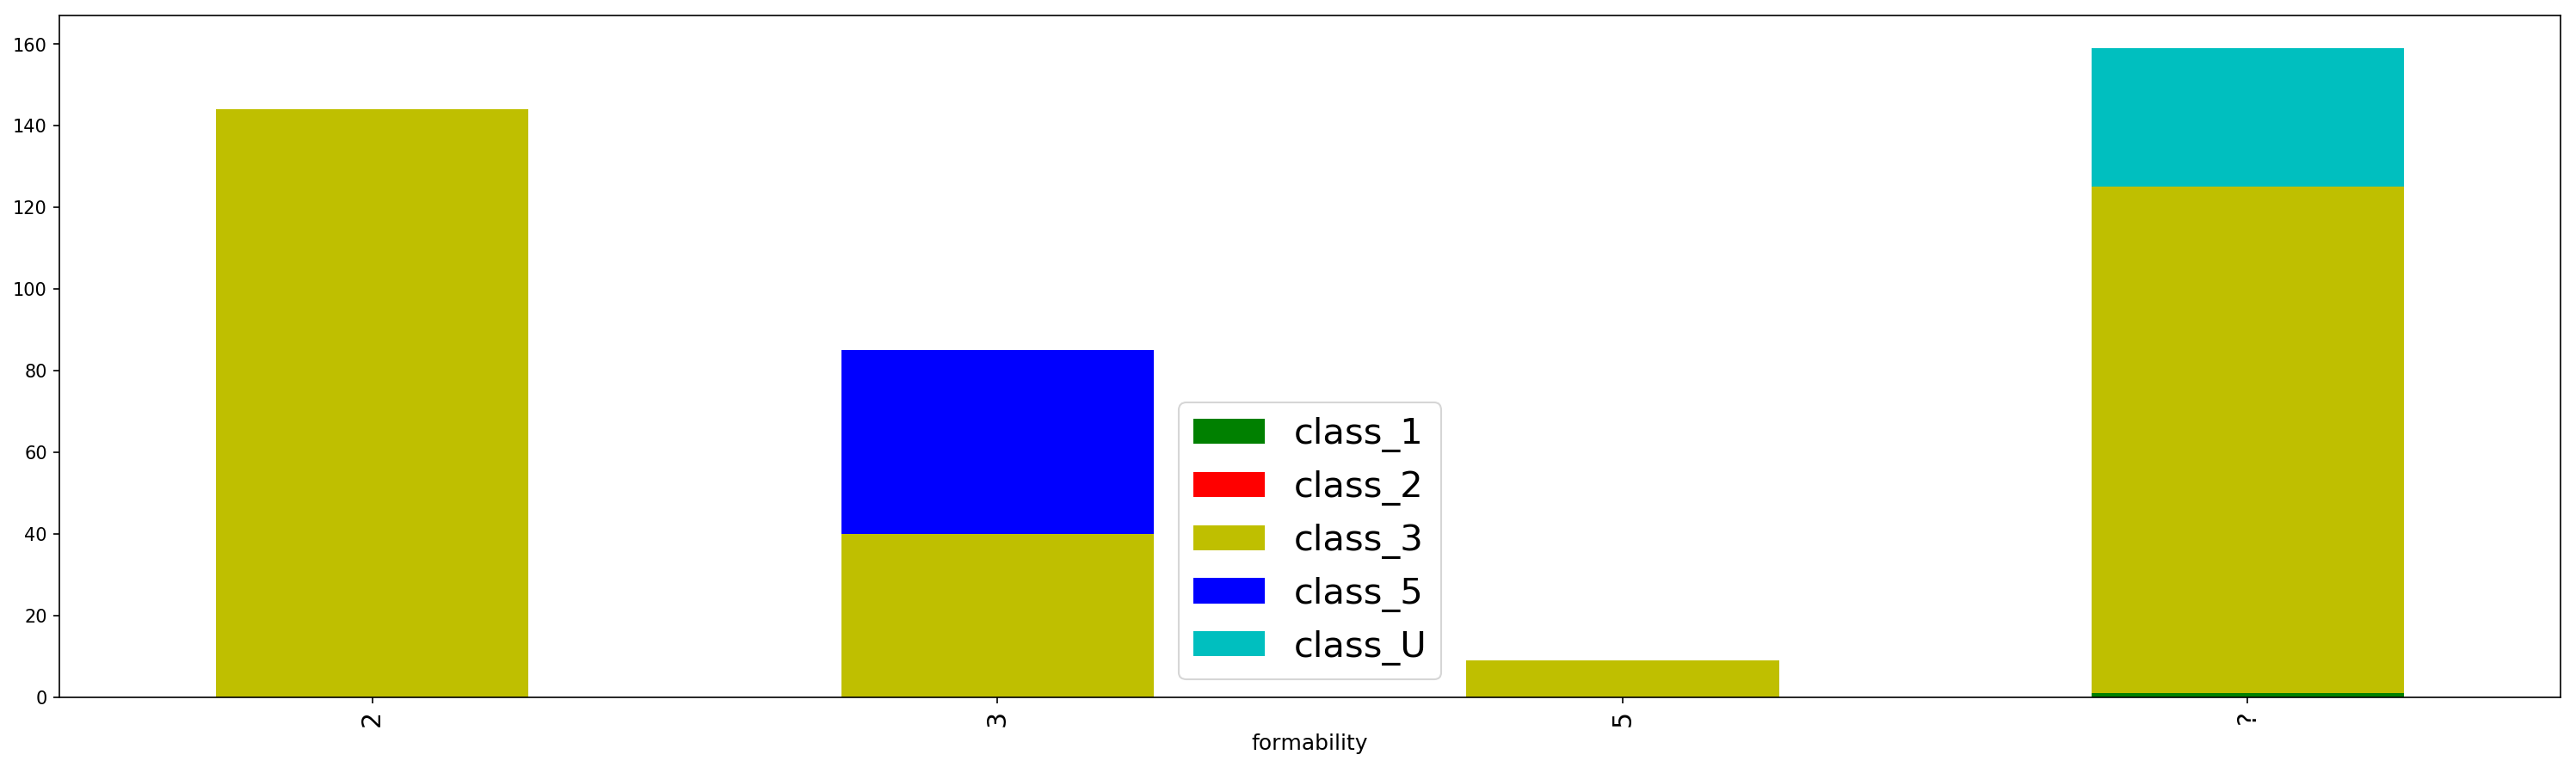

In [62]:
tty.groupby('formability').agg('sum')[['class_1','class_2','class_3','class_5','class_U']].plot(kind='bar', figsize=(25, 7),
                                                           stacked=True, colors=['g', 'r','y','b','c']);

In [68]:
i=0
def __bool__(self):
        return True
    __nonzero__ = __bool__
__bool__=__nonzero__ 
while i<1:
    drop_indices = np.random.choice(train.index, 1, replace=False)
    if (train["classes"].iloc[drop_indices]=='3'):
        train = train.drop(drop_indices);
        i+=1
print(train.shape) 

NameError: name '__nonzero__' is not defined